## Hands on practise on Simple Linear Regression

In [3]:
### Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols 
import statsmodels.api as sm

### Data Validation and Preprocesssing

In [4]:
salary=pd.read_csv("Assets/Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
## Check data types of our variables
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
## Check for missing values
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
## Check for duplicates
salary.duplicated().sum()

0

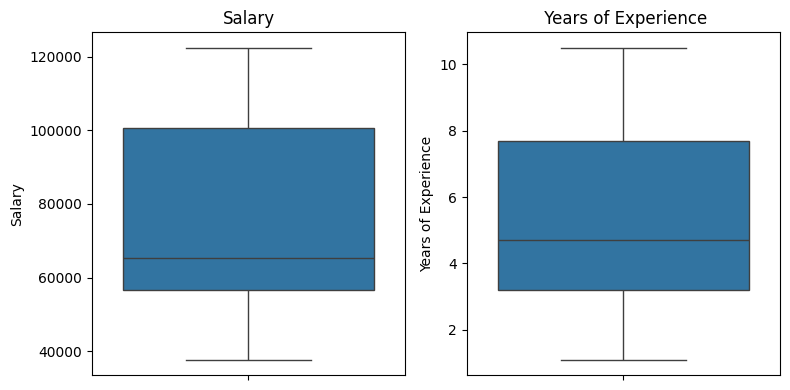

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# Create a box plot for Salary
sns.boxplot(y=salary["Salary"], ax=ax[0])
ax[0].set_ylabel("Salary")
ax[0].set_title("Salary")

sns.boxplot(y=salary["YearsExperience"], ax=ax[1]) 
ax[1].set_ylabel("Years of Experience")
ax[1].set_title(" Years of Experience")

plt.tight_layout()  
plt.show()


Above boxplots shows there were no outliers in the columns

In [9]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Check if Linear Regression assumptions are met

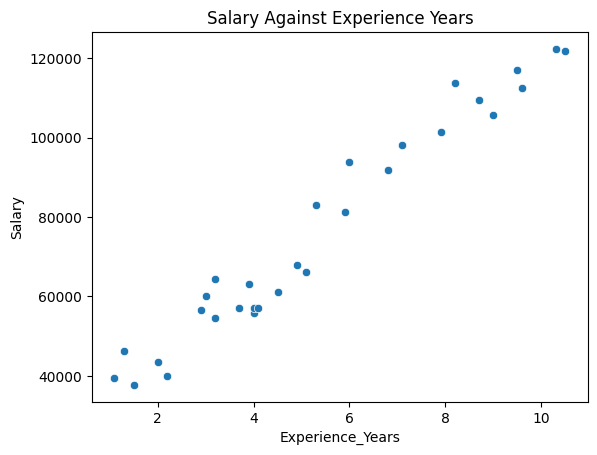

In [10]:
## 1. Linear Relationship
sns.scatterplot(x=salary["YearsExperience"],y=salary["Salary"])
plt.xlabel("Experience_Years")
plt.ylabel("Salary")
plt.title("Salary Against Experience Years")
plt.show()

From the above plot it is evident that there is linear relationship between Salary and years of experience

In [11]:
## 2. Independence
## Since there is one indepedent variable no need to test for this

In [12]:
## Create x and y_variable
X=salary.iloc[:,:-1].values
y=salary.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

#### Splitting into training and test set

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
#If you set shuffle to false, it takes the data as it is i.e from index 1-20.
#to avoid bias it is set default to true

X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [14]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

#### Fitting Simple Linear Regression to Train set

In [15]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression().fit(X_train,y_train)

In [16]:
linear_model=sm.OLS(y_train ,X_train).fit()

In [17]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.03e-15
Time:                        11:36:52   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+04   2818.687      9.501      0.0

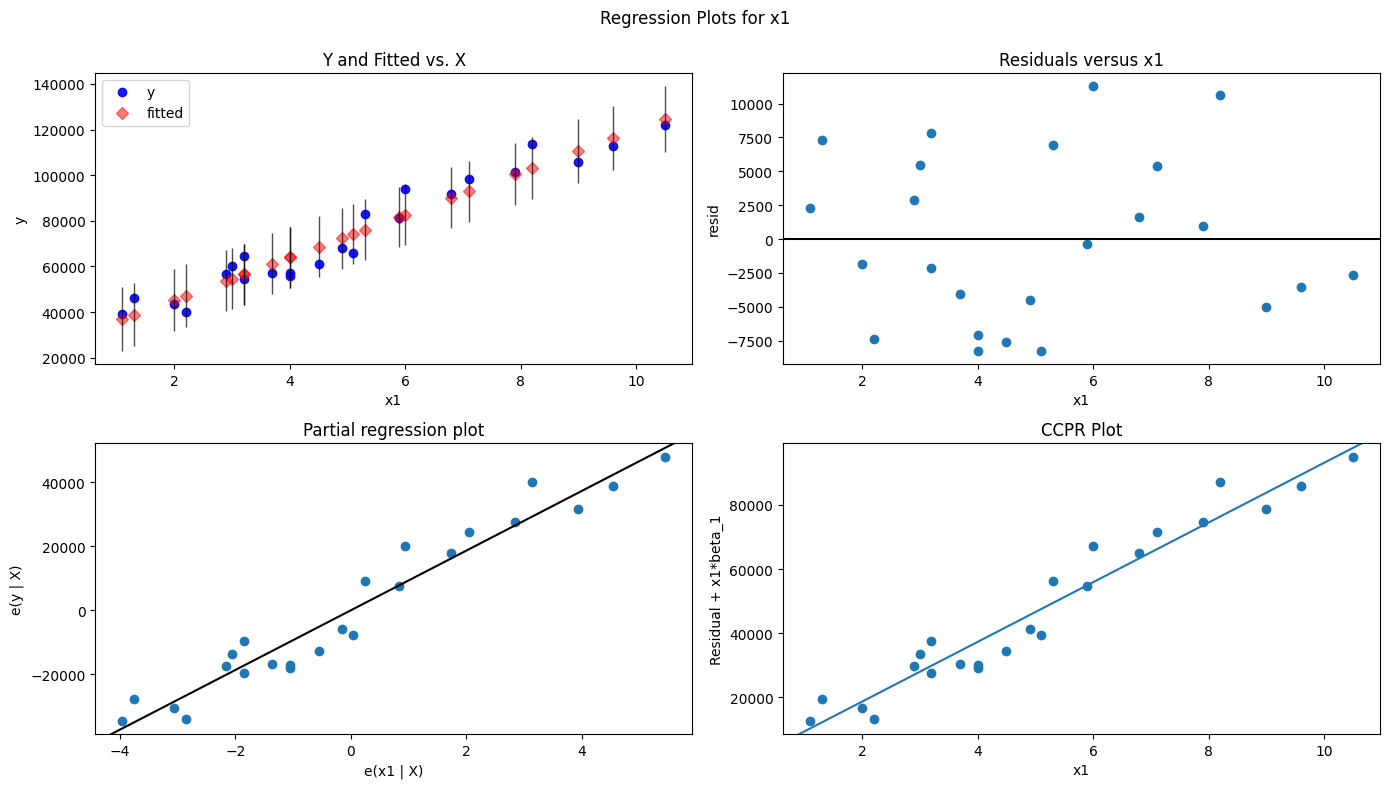

In [18]:
fig = plt.figure(figsize=(14, 8)) 
fig = sm.graphics.plot_regress_exog(linear_model, 'x1', fig=fig) 

##### Model Evaluation

In [20]:
y_pred = linear_model.predict(X_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R^2:", score)
#This means that about 98.8% of the variance in the dependent variable y can be explained by the independent variable x

R^2: 0.988169515729126


In [156]:
fitted_values=linear_model.predict(X_train)

array([-3017.96184072,  -308.62295594, -7880.65717022,   118.85785513,
        1719.43714544,  1631.49724683])

In [167]:
fitted_values=linear_model.predict(X_test)
fitted_values

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [168]:
residuals=y_test-fitted_values
residuals

array([-3017.96184072,  -308.62295594, -7880.65717022,   118.85785513,
        1719.43714544,  1631.49724683])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

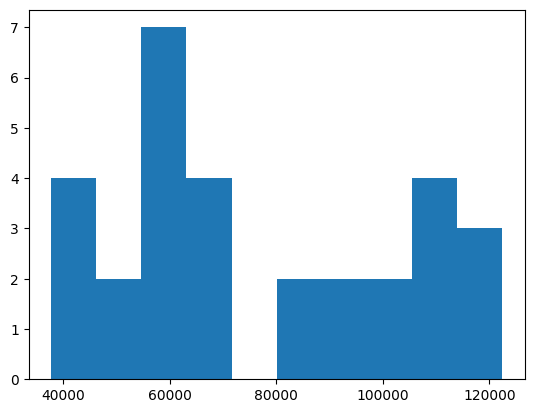

In [157]:
plt.hist(y) 

#### Visualizing Test Set

In [158]:
import sklearn.metrics as sm
# Compute performance metrics
print("Linear regressor performance:")
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Linear regressor performance:
R2 score = 0.99


In [159]:
import sklearn.metrics as sm

print("Linear regressor performance:")
mse = sm.mean_squared_error(y_test, y_pred)
print("Mean Squared Error =", round(mse, 2))

Linear regressor performance:
Mean Squared Error = 12823412.3


In [160]:
# Compute SSE, SST, SSR
errors = y_test - y_pred
sse = np.sum(errors**2)
sst = np.sum((y_test - np.mean(y_test))**2)
ssr = sst - sse

# Compute R-squared
r_squared = ssr / sst

# Compute centroid
centroid = np.mean(y_test)

# Print the results
print("SSE:", sse)
print("SST:", sst)
print("SSR:", ssr)
print("R-squared:", r_squared)
print("Centroid:", centroid)

SSE: 76940473.78875935
SST: 6503577708.833334
SSR: 6426637235.044575
R-squared: 0.988169515729126
Centroid: 84470.16666666667


In [169]:
from joblib import dump

# Save the model to a file
dump(linear_model, 'linear_model_salary.joblib')

['linear_model_salary.joblib']